# Assigment 2

Kshitij Khare
kk5051

----------------------------------------------------------------------

### **IMPORTANT:**

- I am using gradsearchCV that performs an exhaustive search over a specified parameter grid, tuning hyperparameters to find the best combination for a given model. So, it might be possible that it will take a little longer to complete the execution. For this reason, I did not hypertune the AdaBoost algorithm using gradsearchCV. I'll be uploading the pdf version of my ipynb file too. In case, it takes more time you can have a look.


- My machine took 21 minutes 36 seconds to run this notebook. Please bare with it.


- The last section is of some extra work. In case, you want to save time, you can delete the section.

----------------------------------------------------------------------

**Problem Statement:** Develop and compare classification models to predict client subscription to a term deposit based on bank marketing attributes. Identify the most effective algorithm and provide actionable insights for optimizing marketing strategies.

**Data Description:**

I used bank-full.csv.

a. This dataset has 45211 entries, each with 17 inputs, ordered by date (older
version of this dataset with less inputs). First 16 inputs for each entry are
attributes and 17th input is the class to be predicted.

b. Out of 16 attributes, 7 attributes (age, balance, day, duration, campaign,
pdays and previous) are numeric. Rest are categorical (including binary
attributes).


Following are the attributes of this dataset (with brief description):
bank client data:
1. age (numeric)
2. job: type of job
(categorical: "admin.", "unknown", "unemployed", "management",
"housemaid", "entrepreneur", "student", "blue-collar", "self-employed",
"retired", "technician", "services")
3. marital: marital status
(categorical: "married", "divorced", "single";
note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
related with the last contact of the current campaign:
9. contact: contact communication type
(categorical: "unknown", "telephone", "cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year
(categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
other attributes:
13. campaign: number of contacts performed during this campaign and for this
client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from
a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this
client (numeric)
16. poutcome: outcome of the previous marketing campaign
(categorical: "unknown", "other", "failure", "success")
Output variable (desired target):
17. has the client subscribed a term deposit? (binary: "yes","no")


Reference github: https://github.com/prakhardogra921/Bank-Marketing-Classification/blob/master/1.ipynb

# Importing Dependencies

In [113]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pylab
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (3, 3)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading the Dataset

In [114]:
df = pd.read_csv('/content/bank-full.csv', sep= ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [116]:
df.groupby('y').mean().T

<ipython-input-116-0150f2ee3f96>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean().T


y,no,yes
age,40.838986,41.670070
balance,1303.714969,1804.267915
day,15.892290,15.158253
duration,221.182806,537.294574
campaign,2.846350,2.141047
pdays,36.421372,68.702968
previous,0.502154,1.170354


In [117]:
df.groupby('job').mean().T

<ipython-input-117-a09d5a7f5b16>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('job').mean().T


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,39.289886,40.044081,42.190989,46.415323,40.449567,61.626767,40.484484,38.740250,26.542644,39.314598,40.961627,47.593750
balance,1135.838909,1078.826654,1521.470074,1392.395161,1763.616832,1984.215106,1647.970868,997.088108,1388.060768,1252.632092,1521.745971,1772.357639
day,15.564301,15.442561,15.702085,16.002419,16.114189,15.439488,16.027866,15.635532,14.897655,16.408582,15.498081,14.642361
duration,246.896732,262.901562,256.309348,245.825000,253.995771,287.361307,268.157061,259.318729,246.656716,252.904962,288.543361,237.611111
campaign,2.575324,2.816995,2.799597,2.820968,2.864348,2.346731,2.853072,2.718344,2.299574,2.906805,2.432080,3.309028
pdays,47.859021,44.033498,32.486214,21.505645,38.665468,37.443905,34.747308,41.995185,57.041578,37.195077,34.146585,20.982639
previous,0.671630,0.505138,0.478144,0.371774,0.668006,0.638693,0.551615,0.501204,0.953092,0.574569,0.466616,0.319444


In [118]:
df.groupby('marital').mean().T

<ipython-input-118-d001d216d5ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('marital').mean().T


marital,divorced,married,single
age,45.782984,43.408099,33.703440
balance,1178.872287,1425.925590,1301.497654
day,15.796428,15.854487,15.708210
duration,262.517188,253.412765,266.497967
campaign,2.630882,2.842875,2.649805
pdays,41.001728,37.950467,44.652385
previous,0.551373,0.556552,0.642690


In [119]:
df.groupby('education').mean().T

<ipython-input-119-d72ae1436774>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('education').mean().T


education,primary,secondary,tertiary,unknown
age,45.865567,39.964270,39.593640,44.510501
balance,1250.949934,1154.880786,1758.416435,1526.754443
day,15.421398,15.759159,16.086535,15.810985
duration,255.933002,258.685760,258.518532,257.313947
campaign,2.834331,2.700802,2.825577,2.849219
pdays,36.081740,42.353504,39.024134,36.856220
previous,0.489272,0.567753,0.661980,0.488422


# Looking for interesting facts

In [120]:
# lets get some more understanding of data and relationships
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan  y  
no    no     33162
      yes     4805
yes   no      6760
      yes      484
dtype: int64


check 2:  job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
dtype: int64


check 3:  marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
dtype: int64


check 4:  education 

<ipython-input-121-18d93fefef73>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'loan', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)


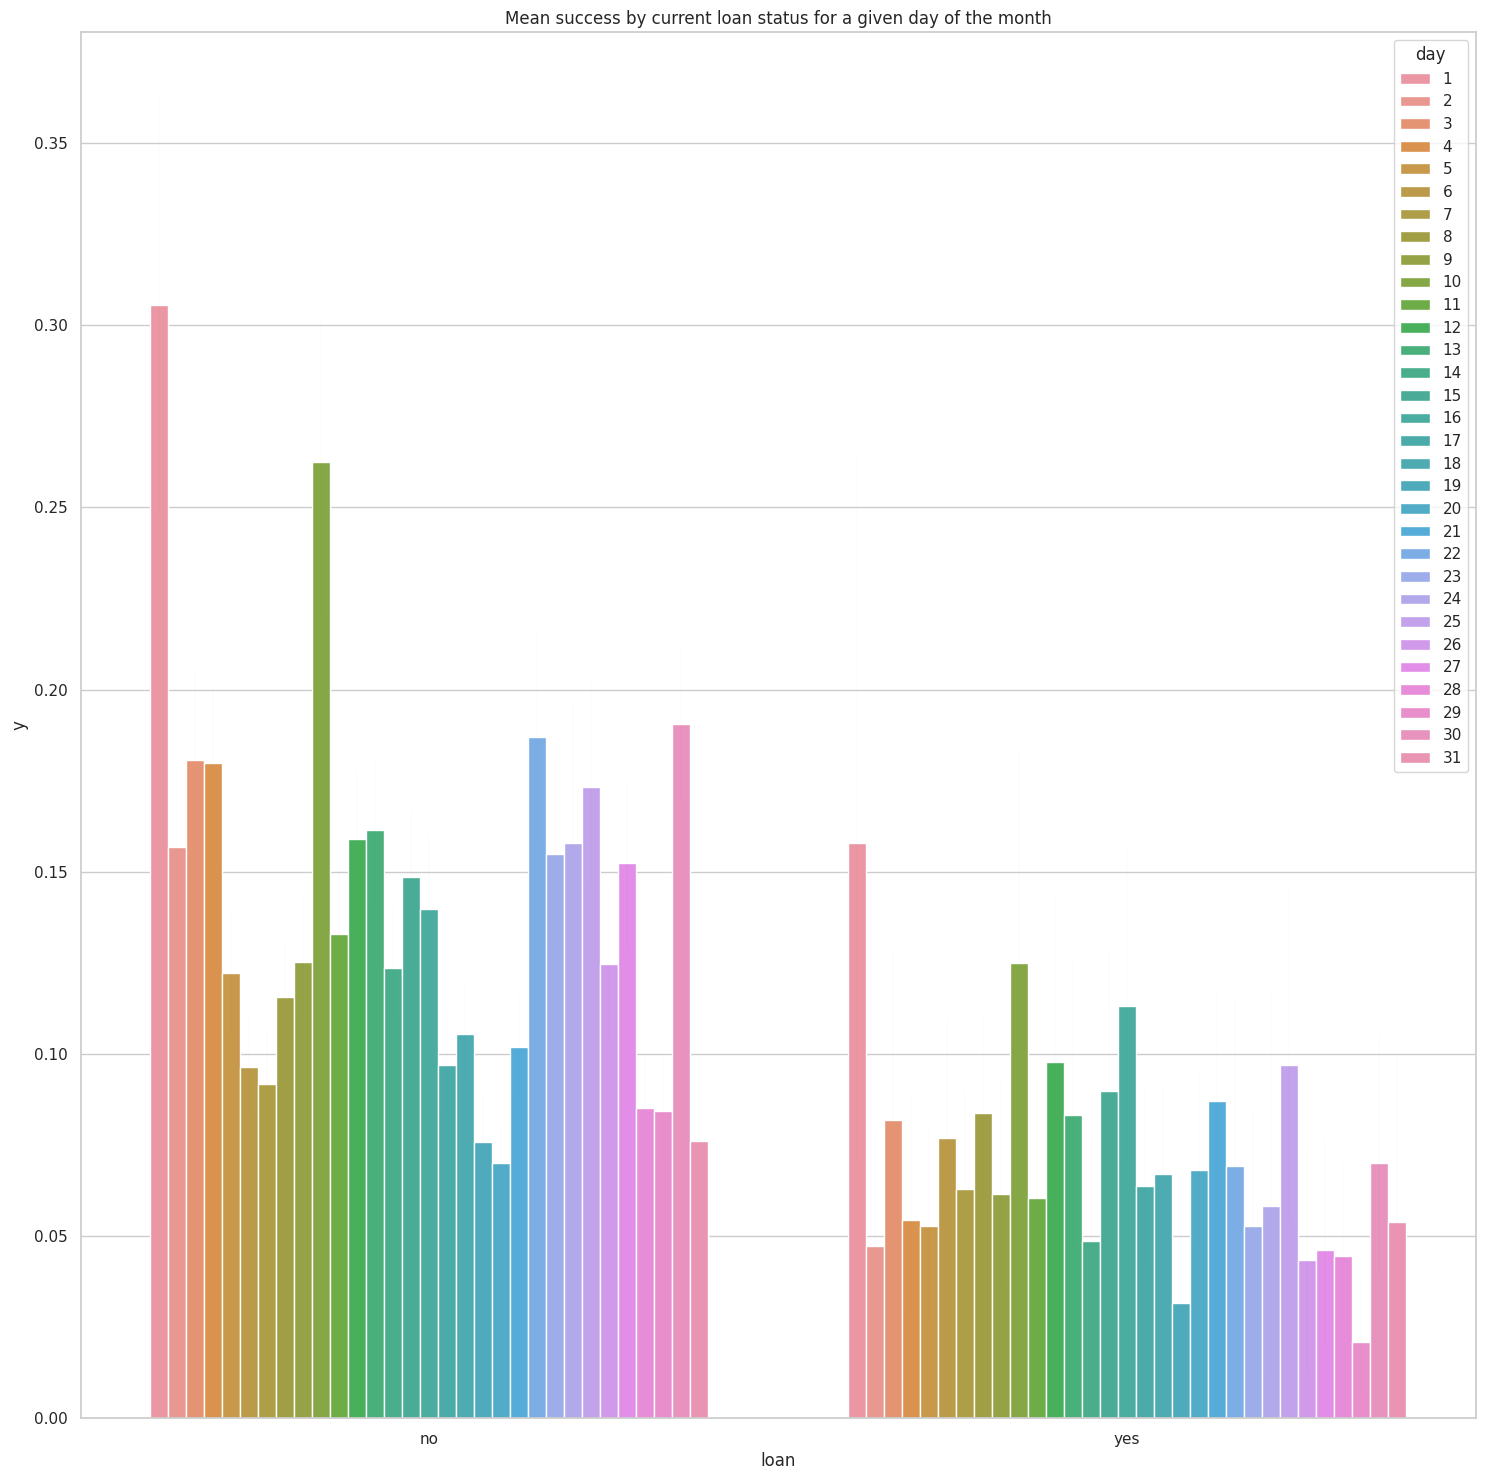

In [121]:
#Label Encoding the class attribute
label_encoder = LabelEncoder()
label_encoder.fit(df["y"])
df["y"] = label_encoder.transform(df["y"])

pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'loan', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.title('Mean success by current loan status for a given day of the month')
plt.show()

<ipython-input-122-b958d548f0ac>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'job', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)


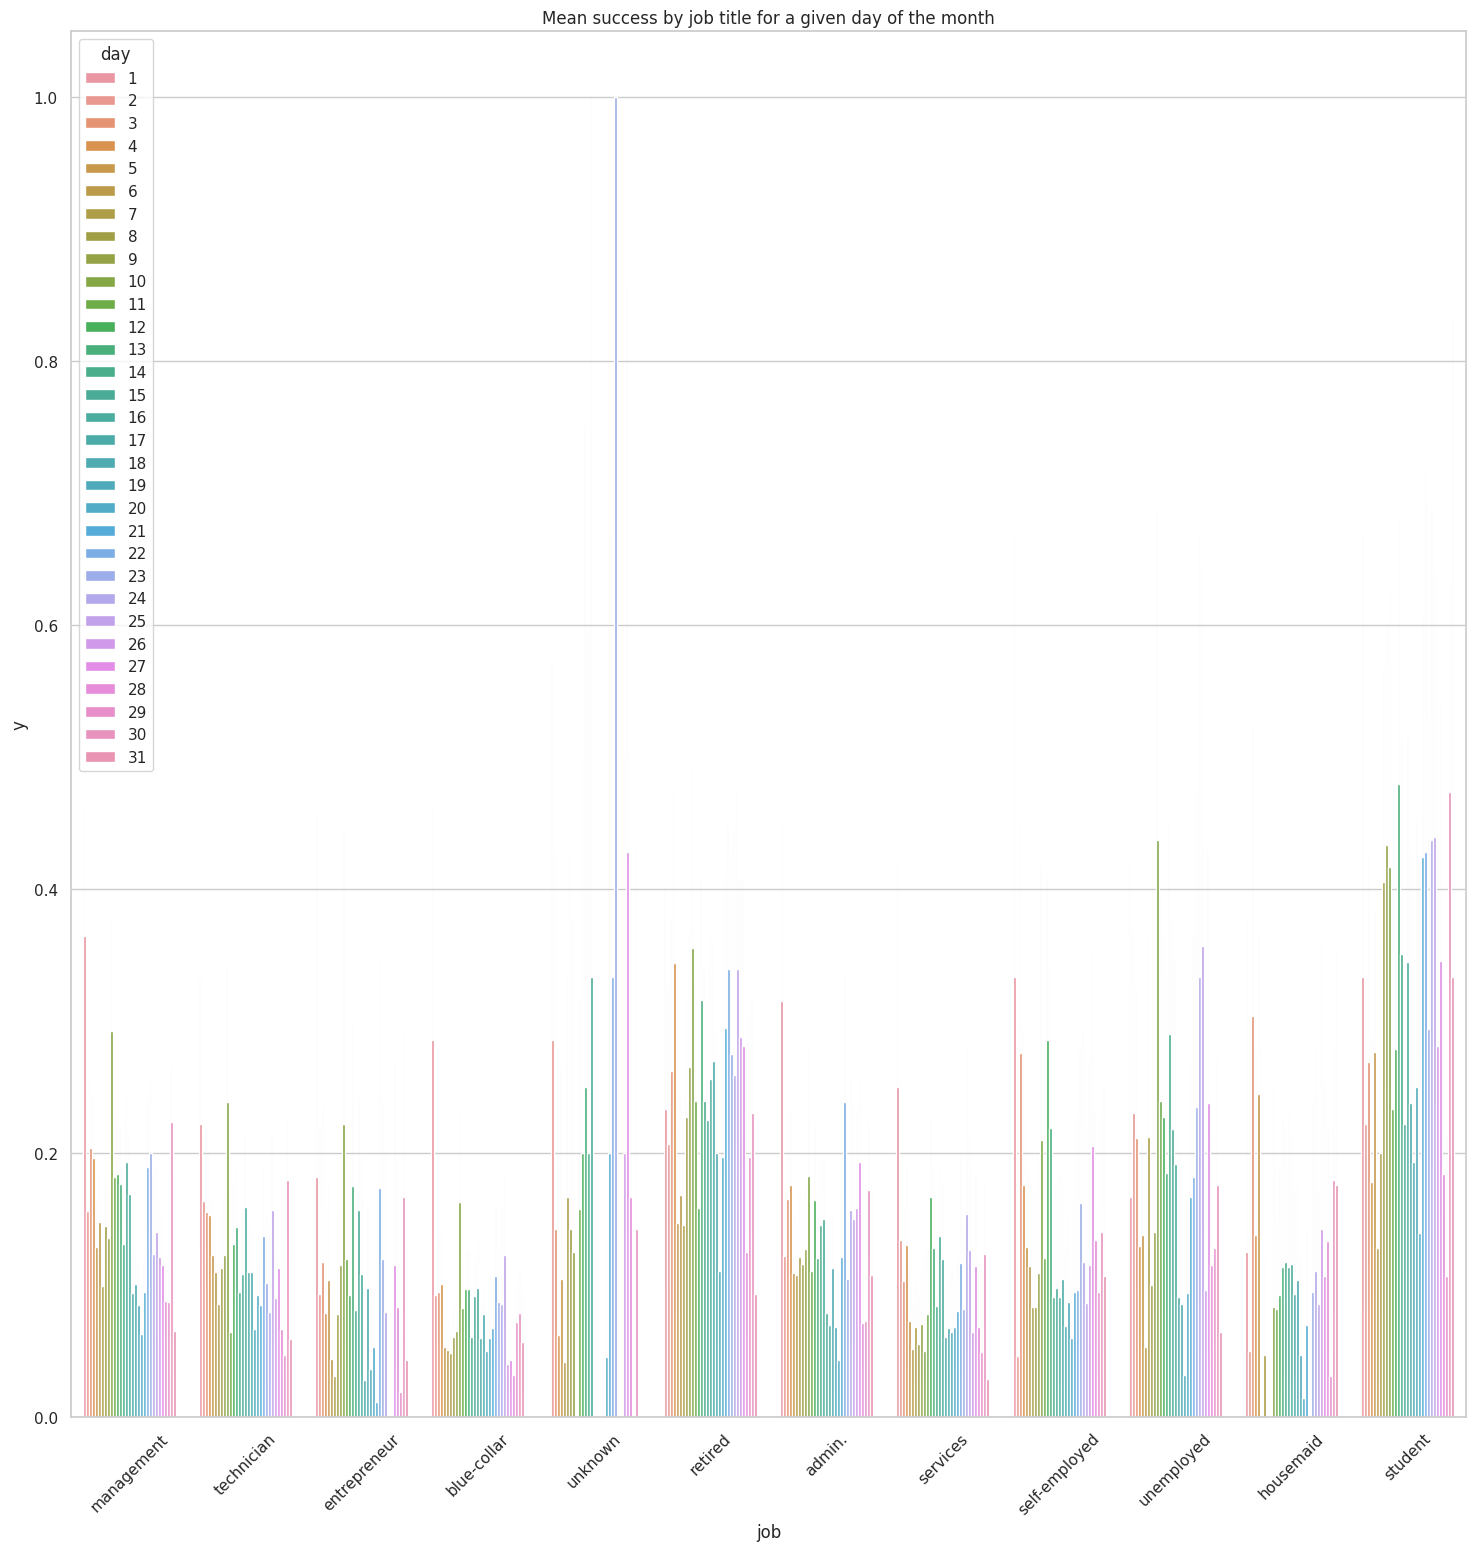

In [122]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'job', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by job title for a given day of the month')
plt.show()

<ipython-input-123-88eb244fedaa>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'marital', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)


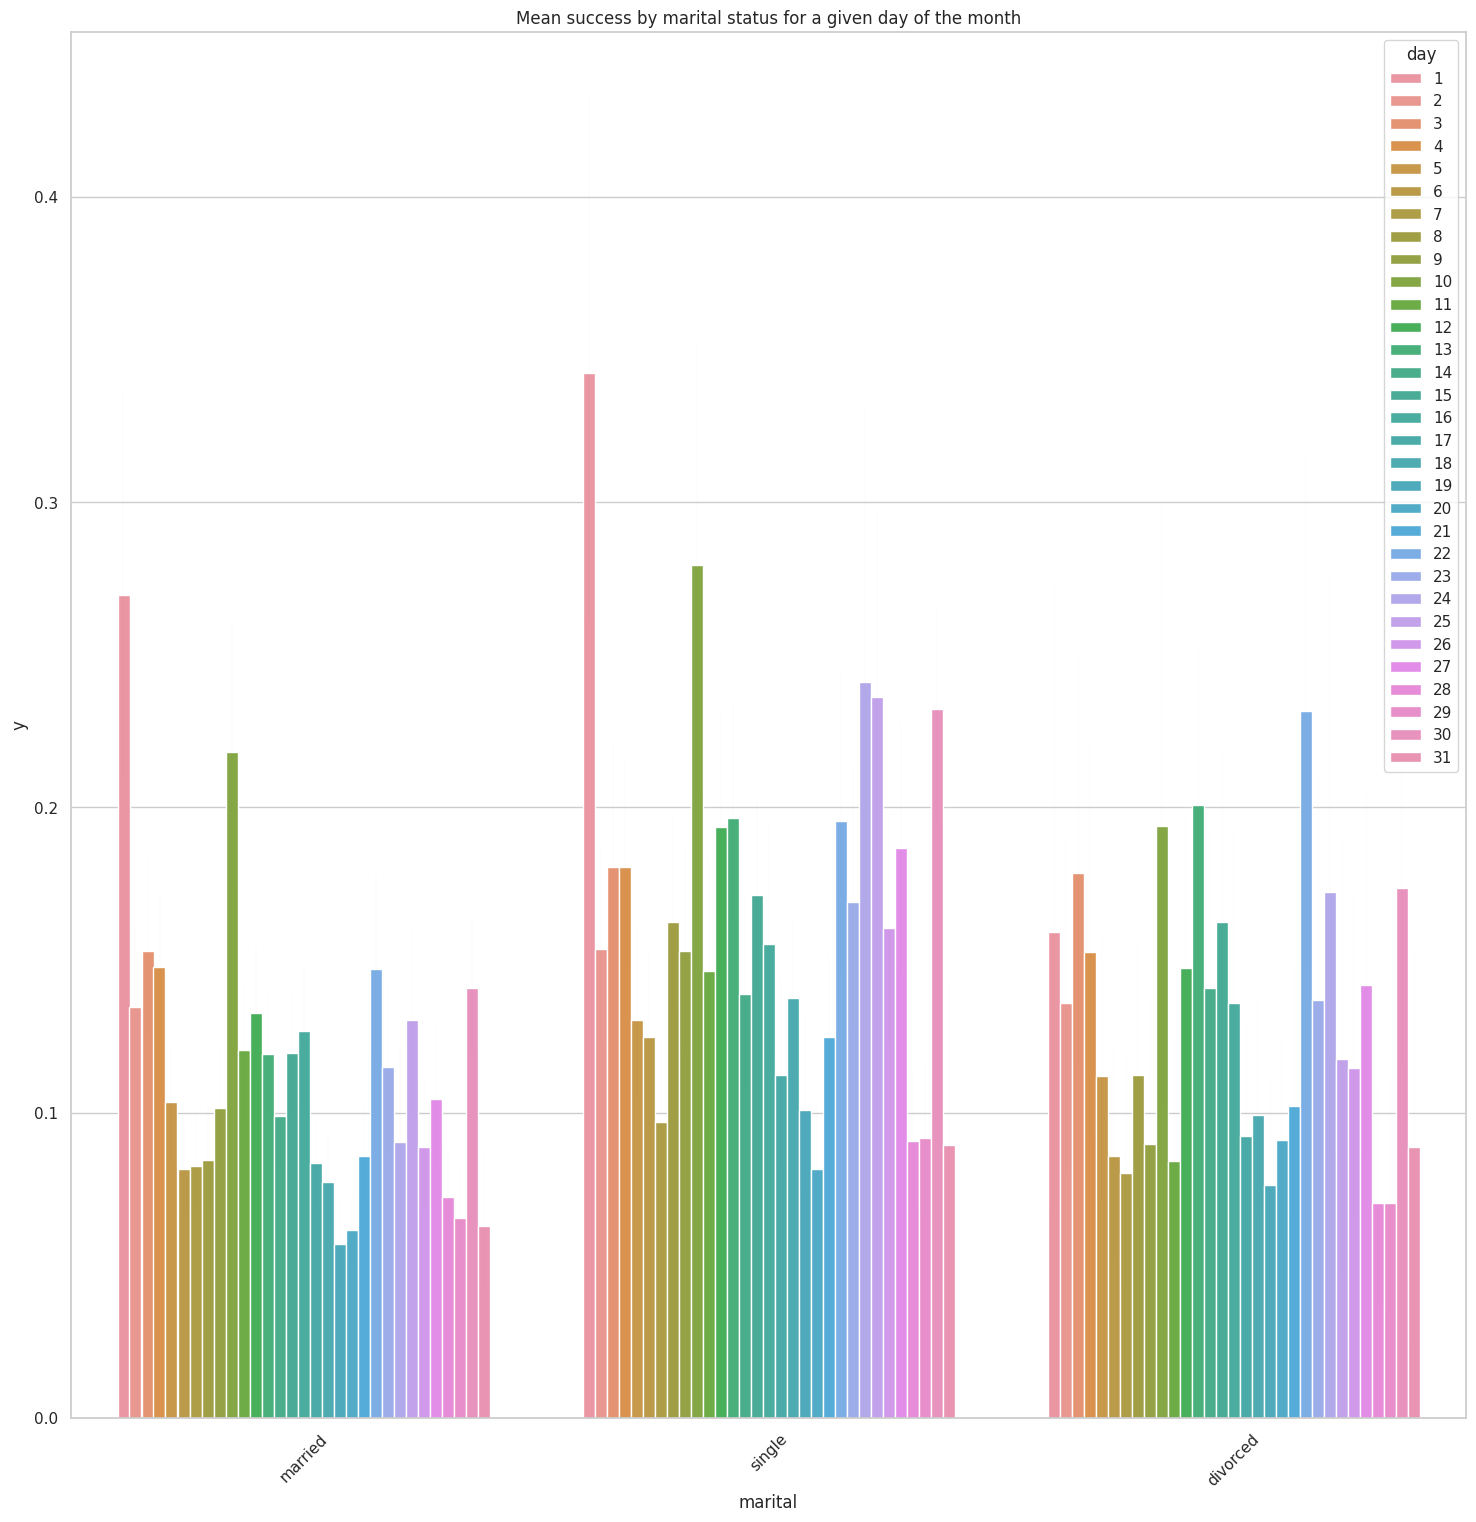

In [123]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'marital', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by marital status for a given day of the month')
plt.show()

<ipython-input-124-0f06cadbb617>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'education', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)


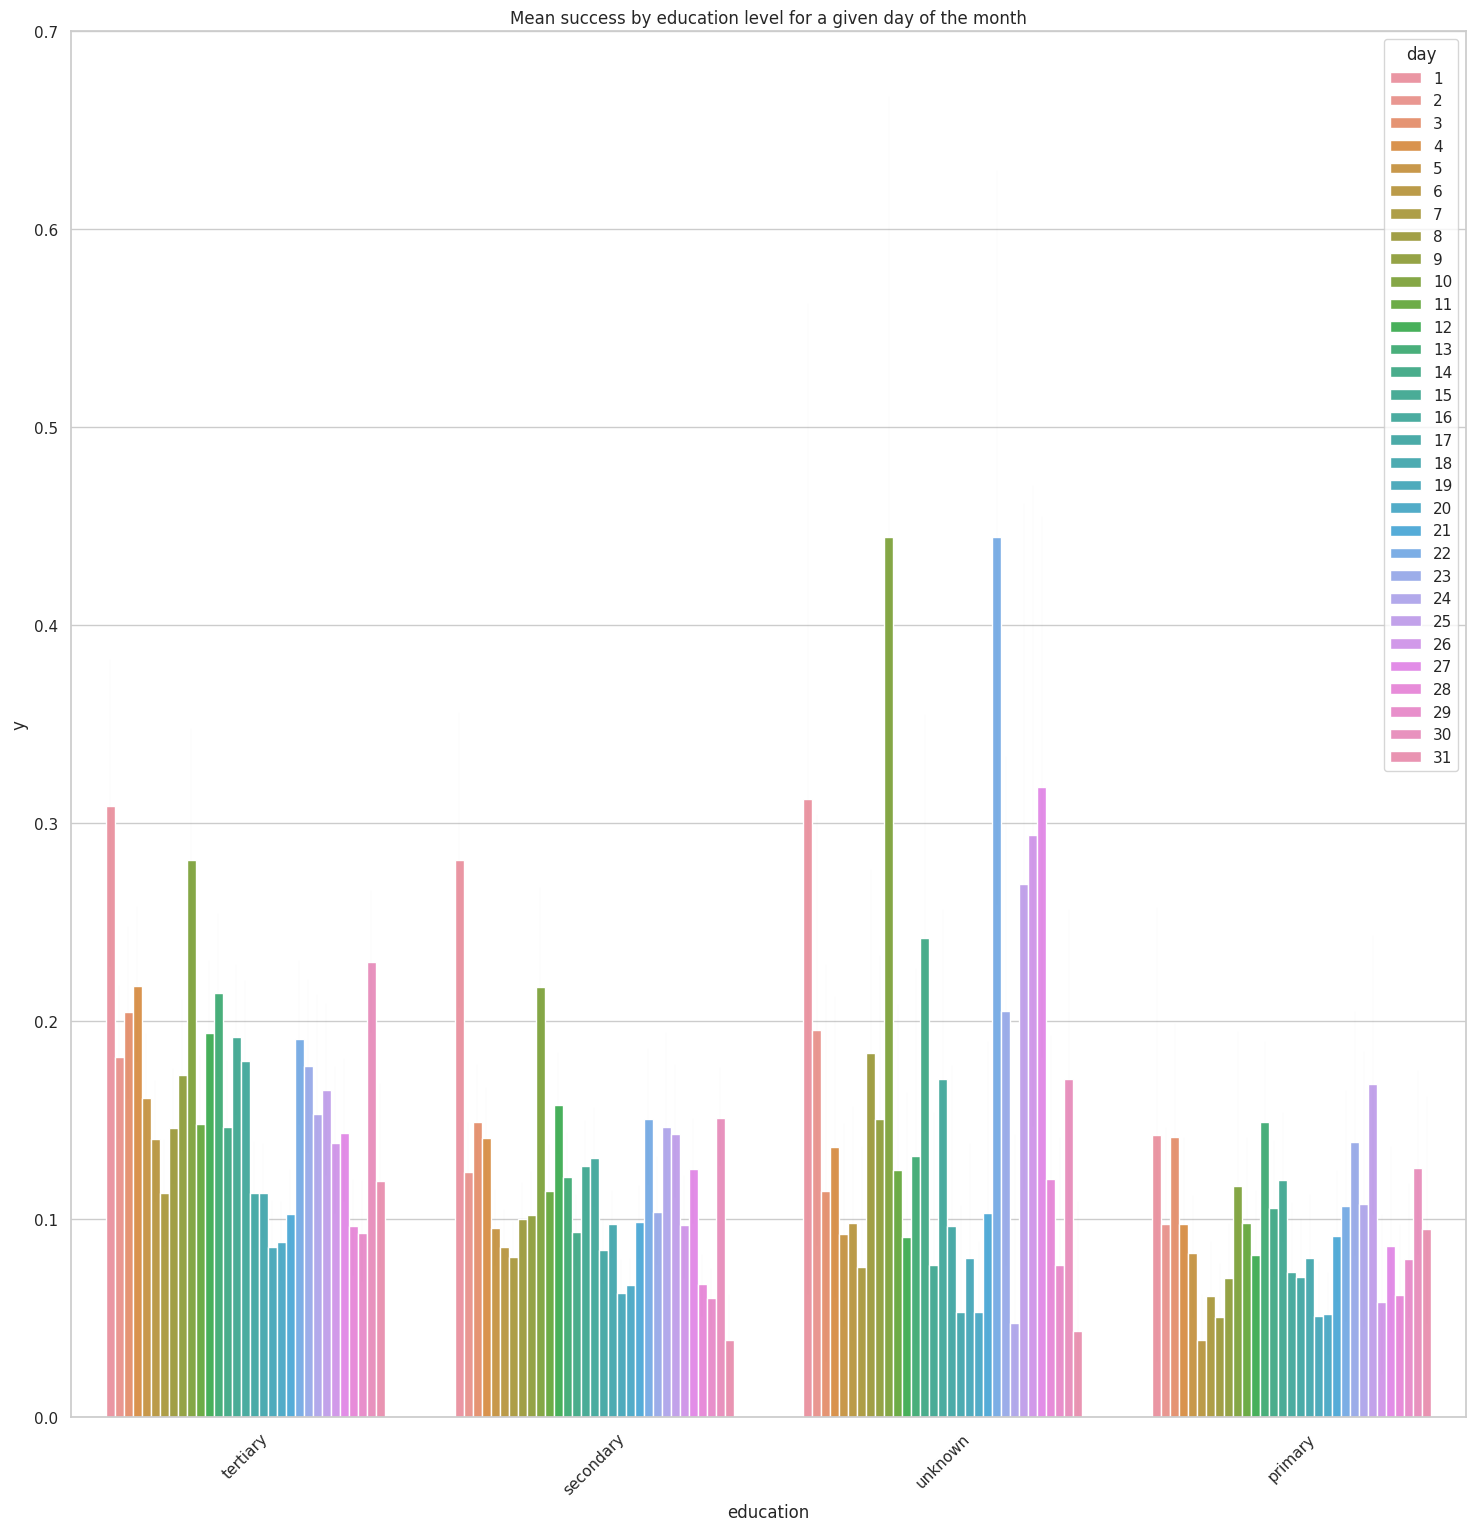

In [124]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'education', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by education level for a given day of the month')
plt.show()

<ipython-input-125-2bb70d1c6fd1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="campaign", y="y", data=df, ci=95, errwidth = 0.01)


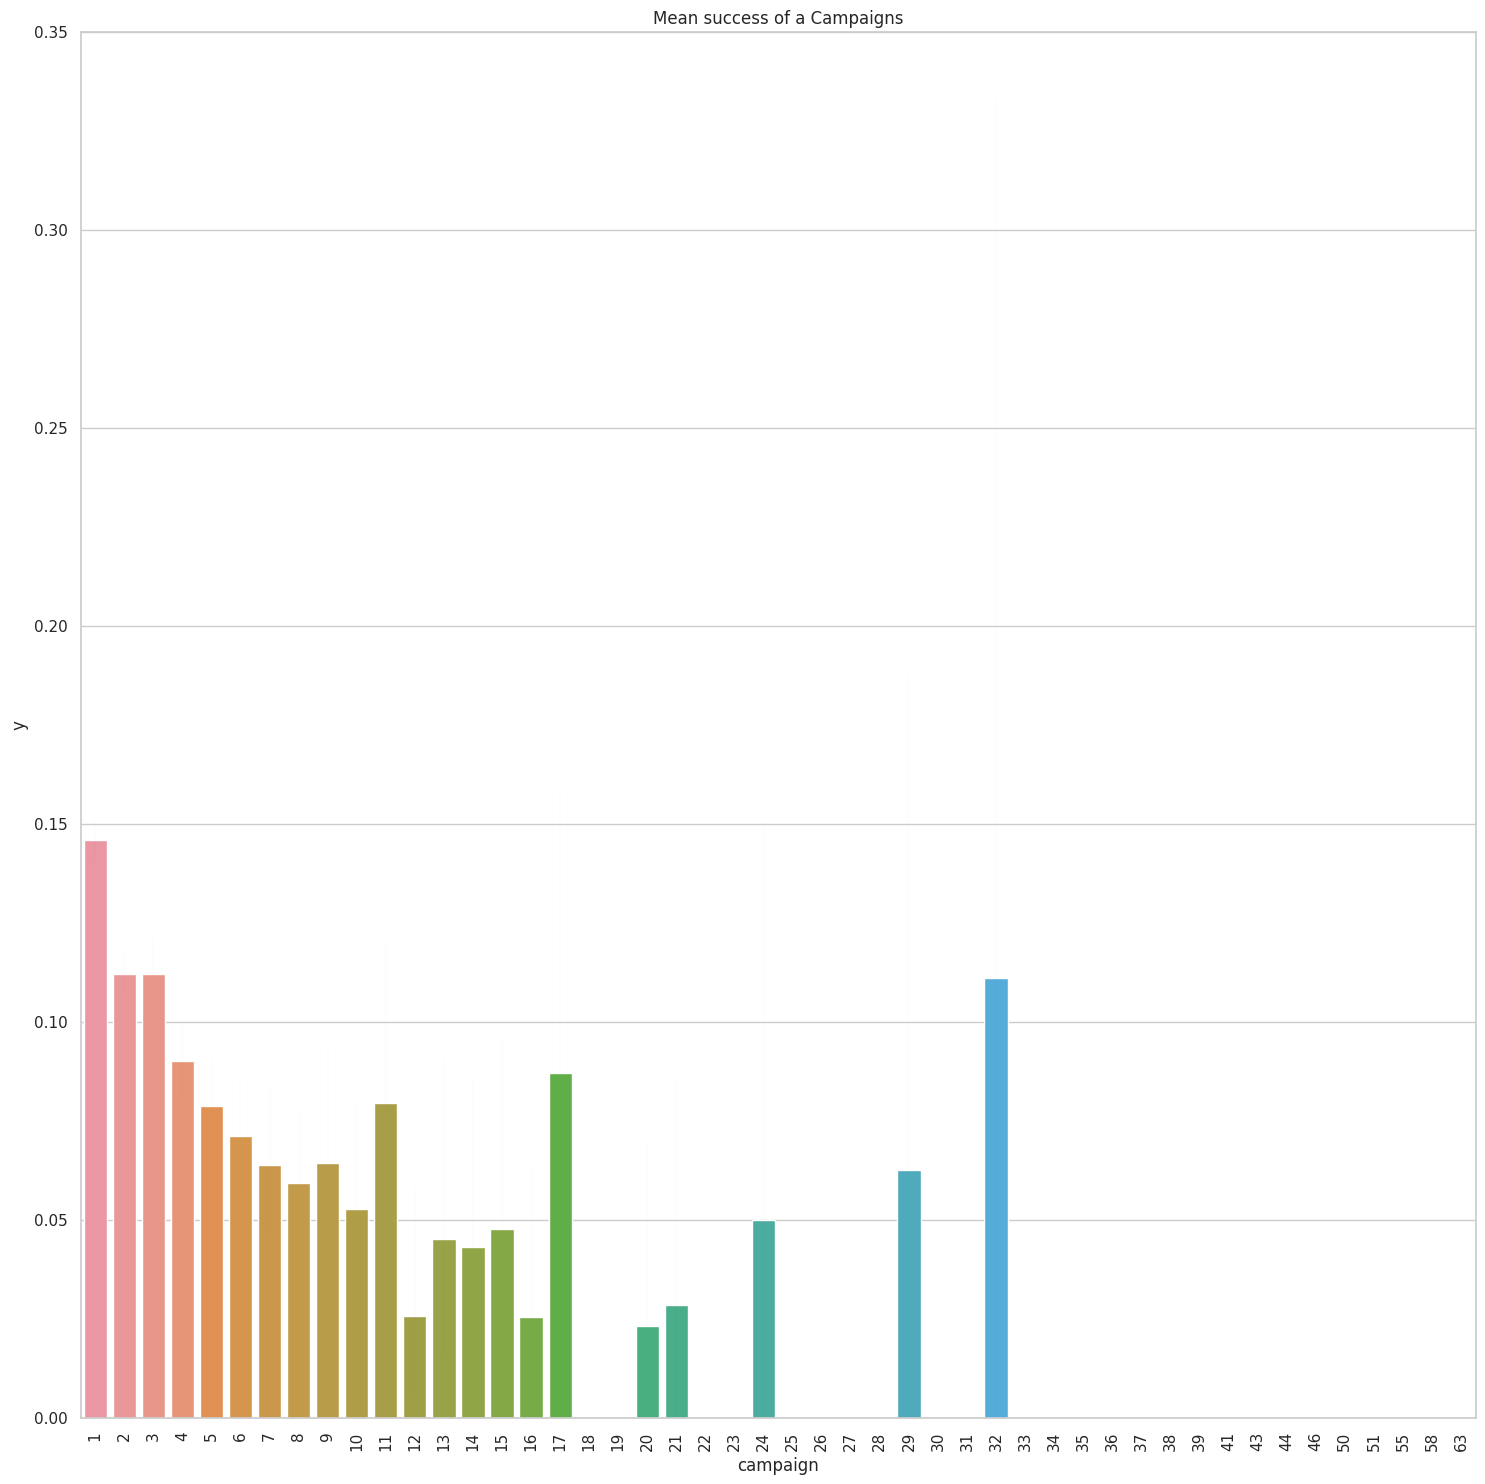

In [125]:
# Performance of Campaigns
sns.barplot(x="campaign", y="y", data=df, ci=95, errwidth = 0.01)
plt.xticks(rotation=90)
plt.title('Mean success of a Campaigns')
plt.show()

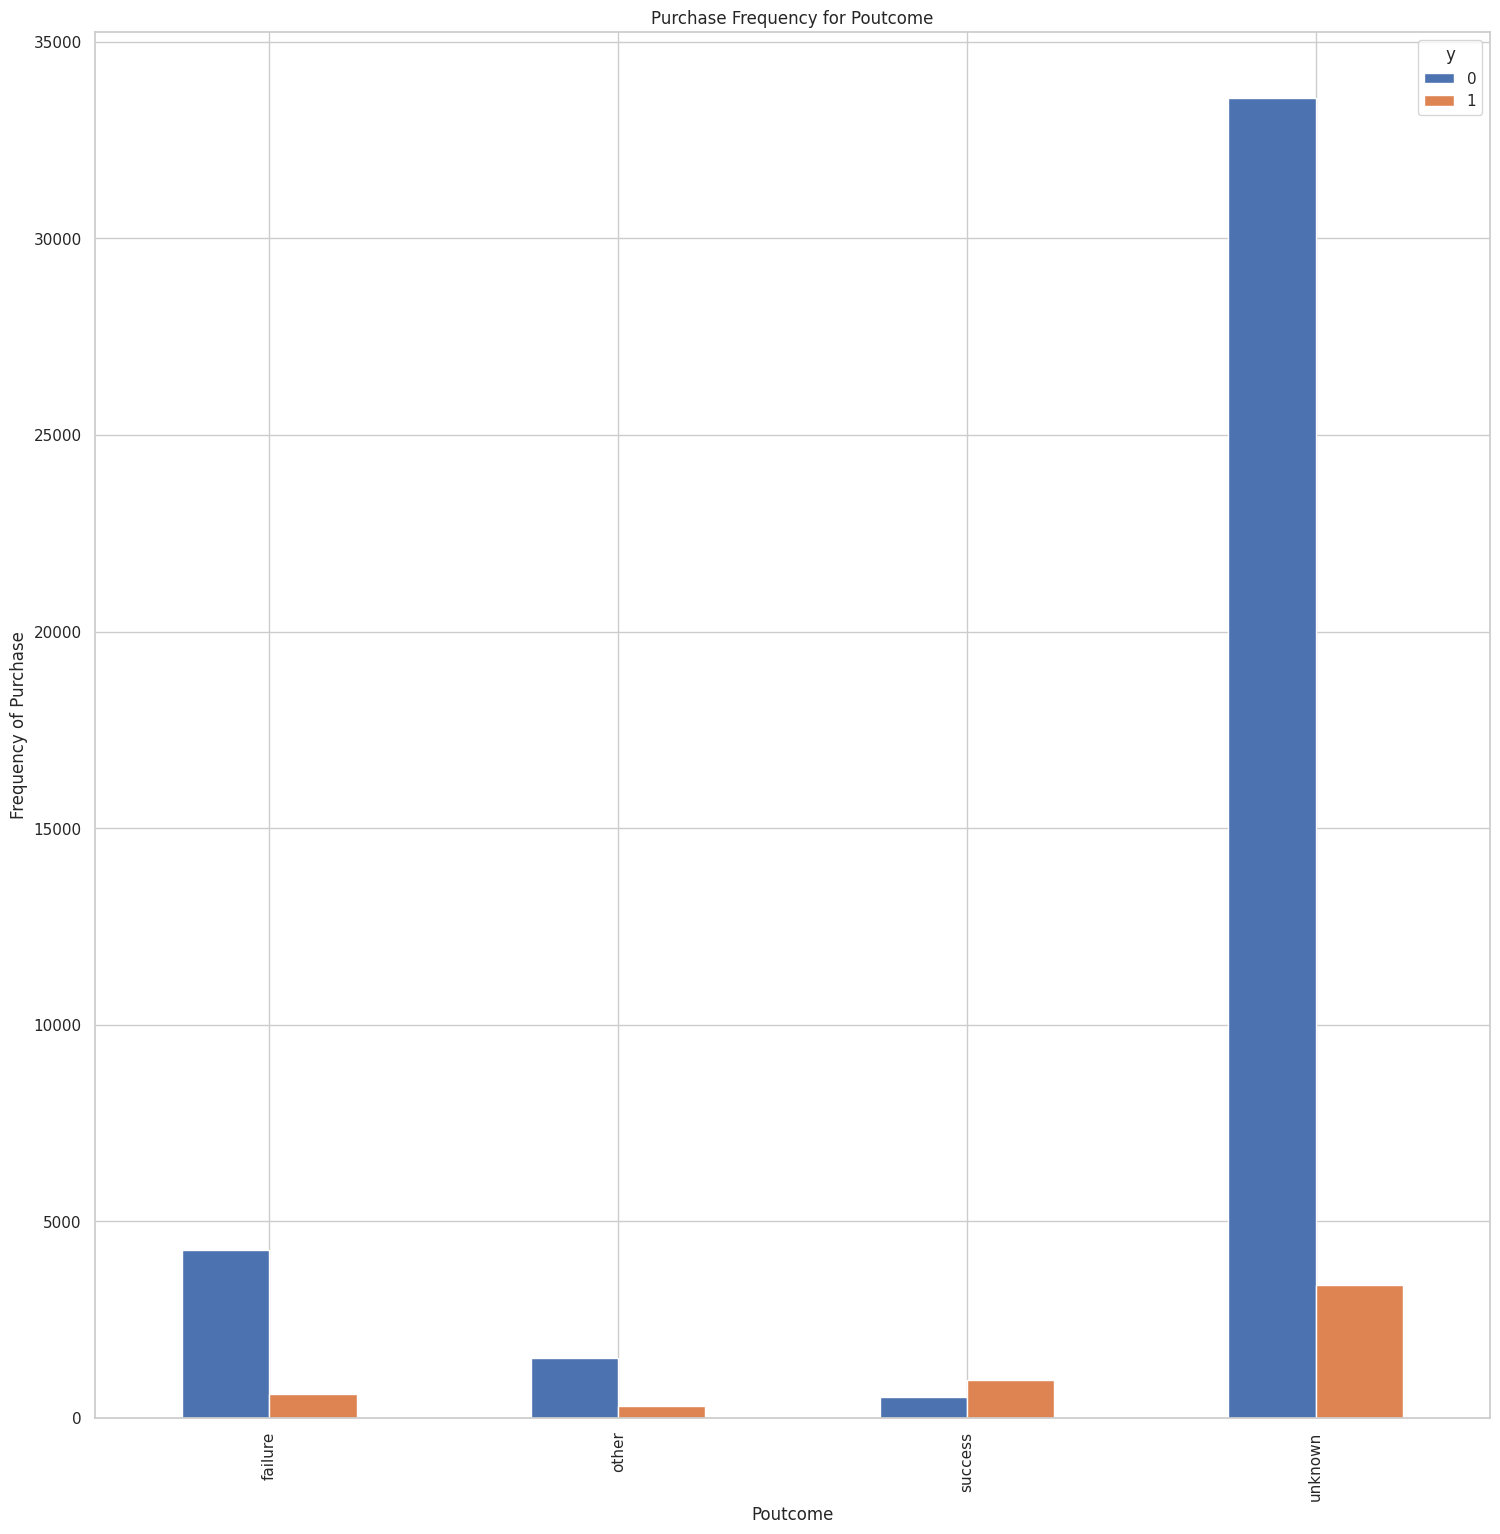

In [126]:
pd.crosstab(df.poutcome, df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

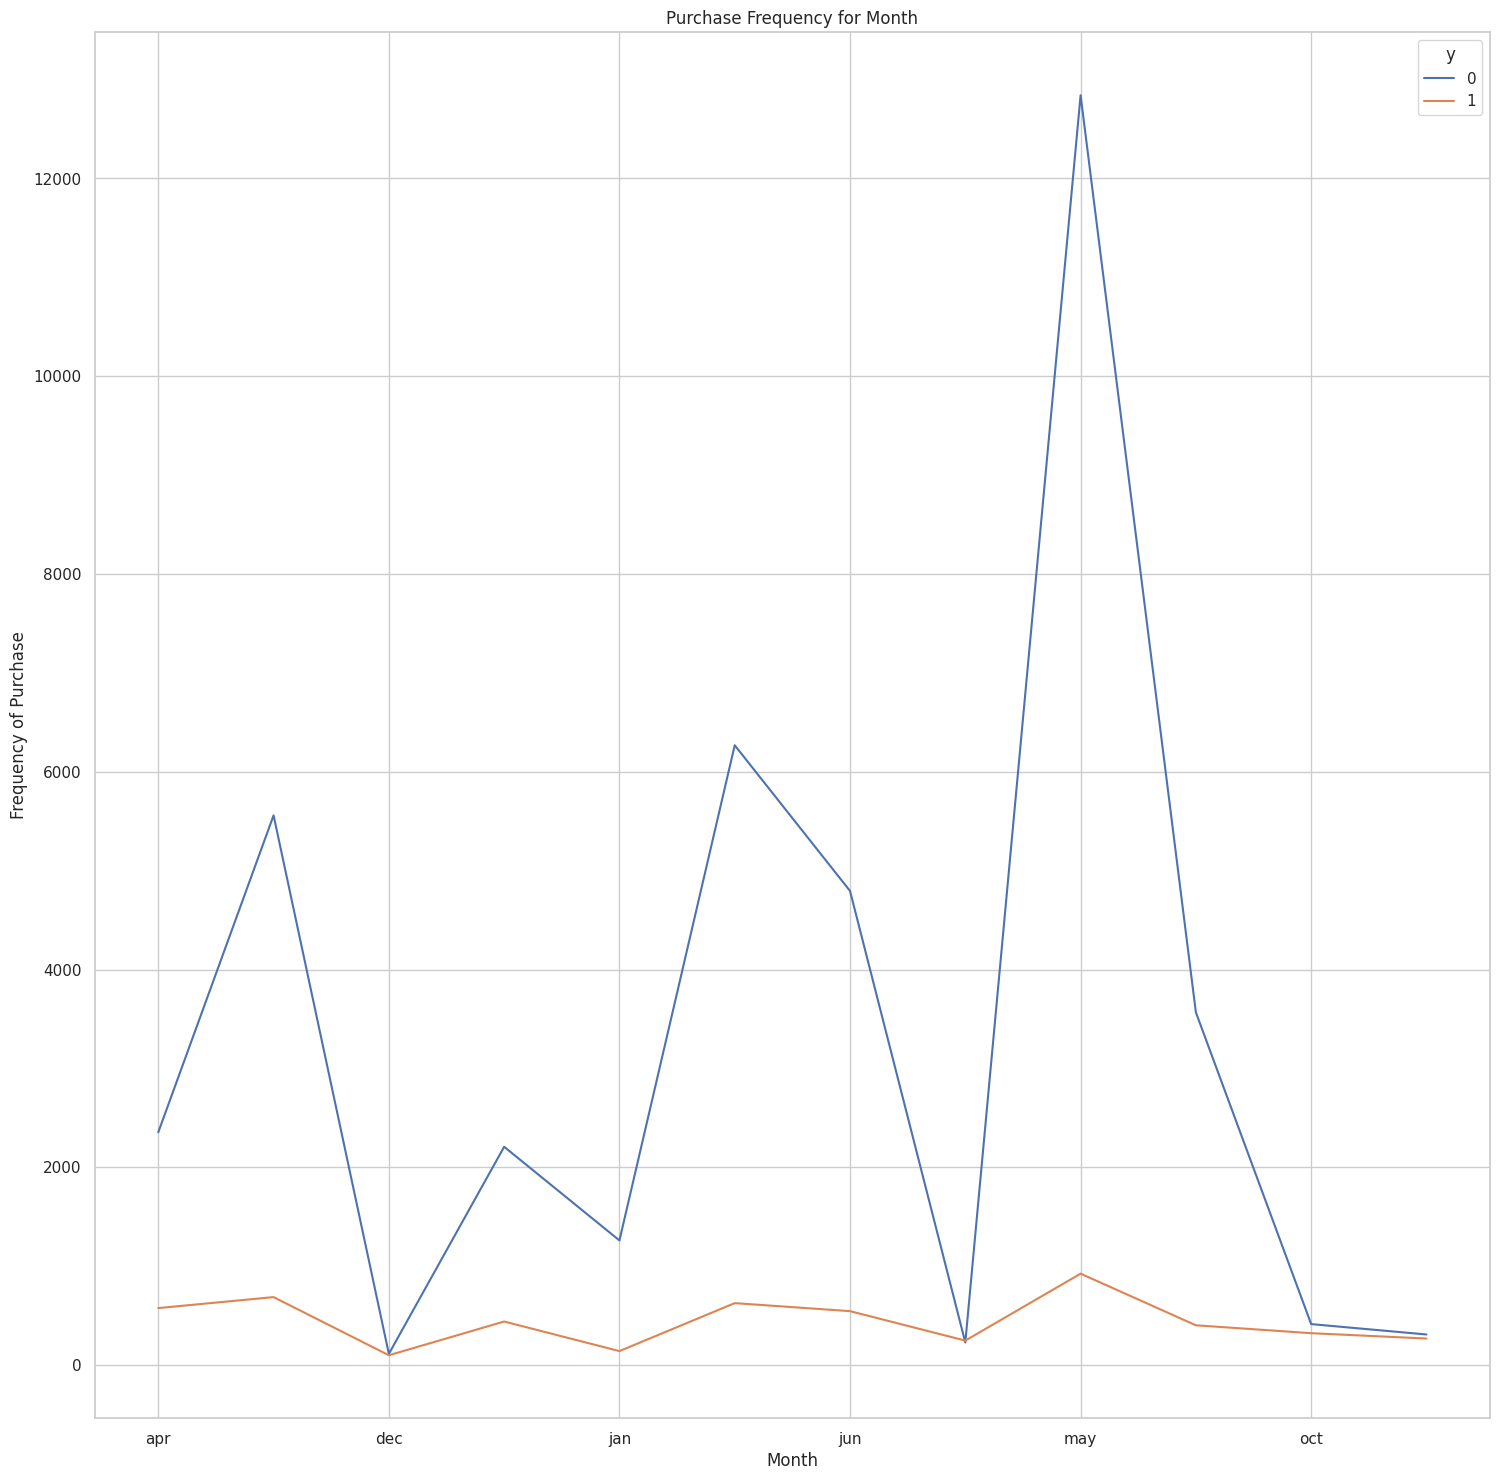

In [127]:
pd.crosstab(df.month, df.y).plot(kind='line')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

# Feature Engineering - Bonus Opportunity (+25 points)

# Creating some categorical Attributes

In [128]:
df['bal_sign'] = pd.Series(df['balance'] > 0)

# Label Encoding the Binary Attributes

In [129]:
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [130]:
# Will be On-Hot Encoded Later
cols = ['job', 'contact', 'marital','education', 'poutcome', 'month', 'day']
for label in cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [131]:
df_corr = df.corr()

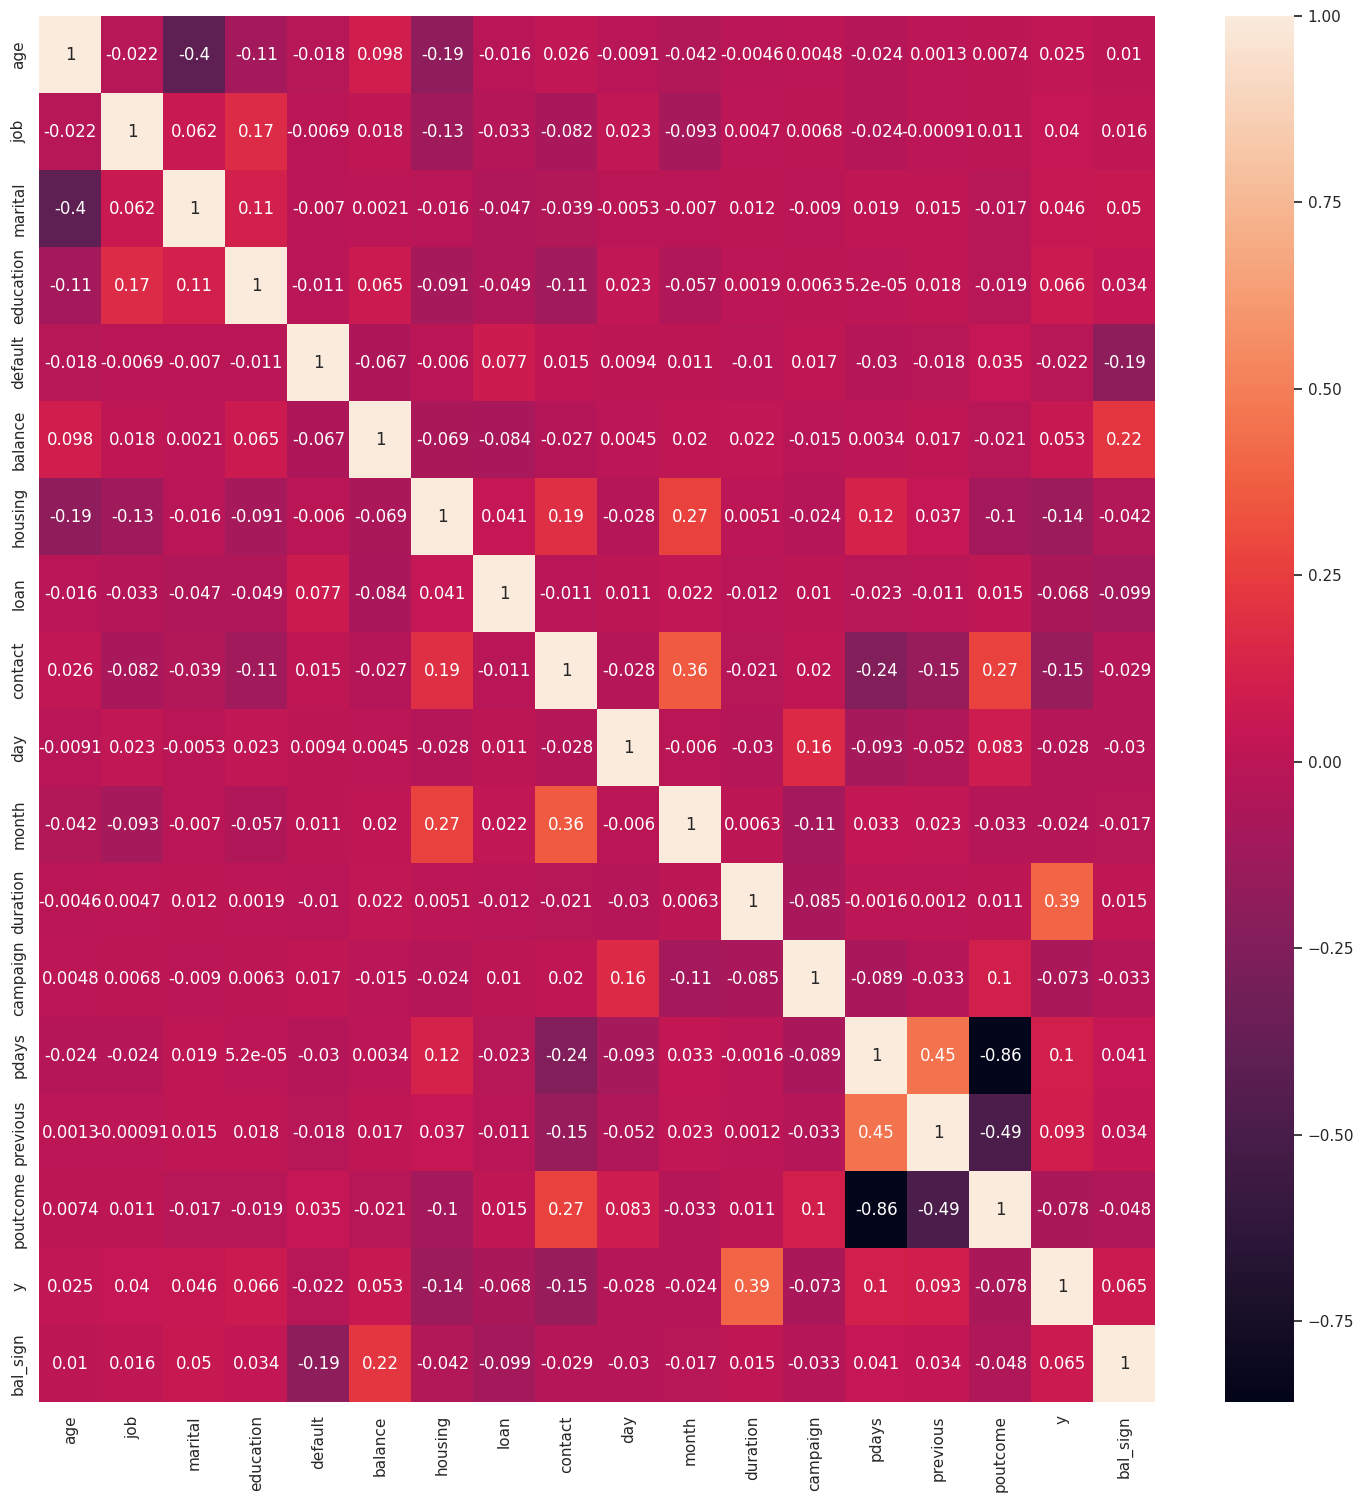

In [132]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

Important observations:

- From the above plot we can observe that most of the features are independent of each other.
- Feature-pair (pdays - previous) is highly negatively correlated. Therefore we can remove "pdays"

In [133]:
final_df = df.drop(["pdays"], axis = 1)

In [134]:
df_corr = final_df.corr()

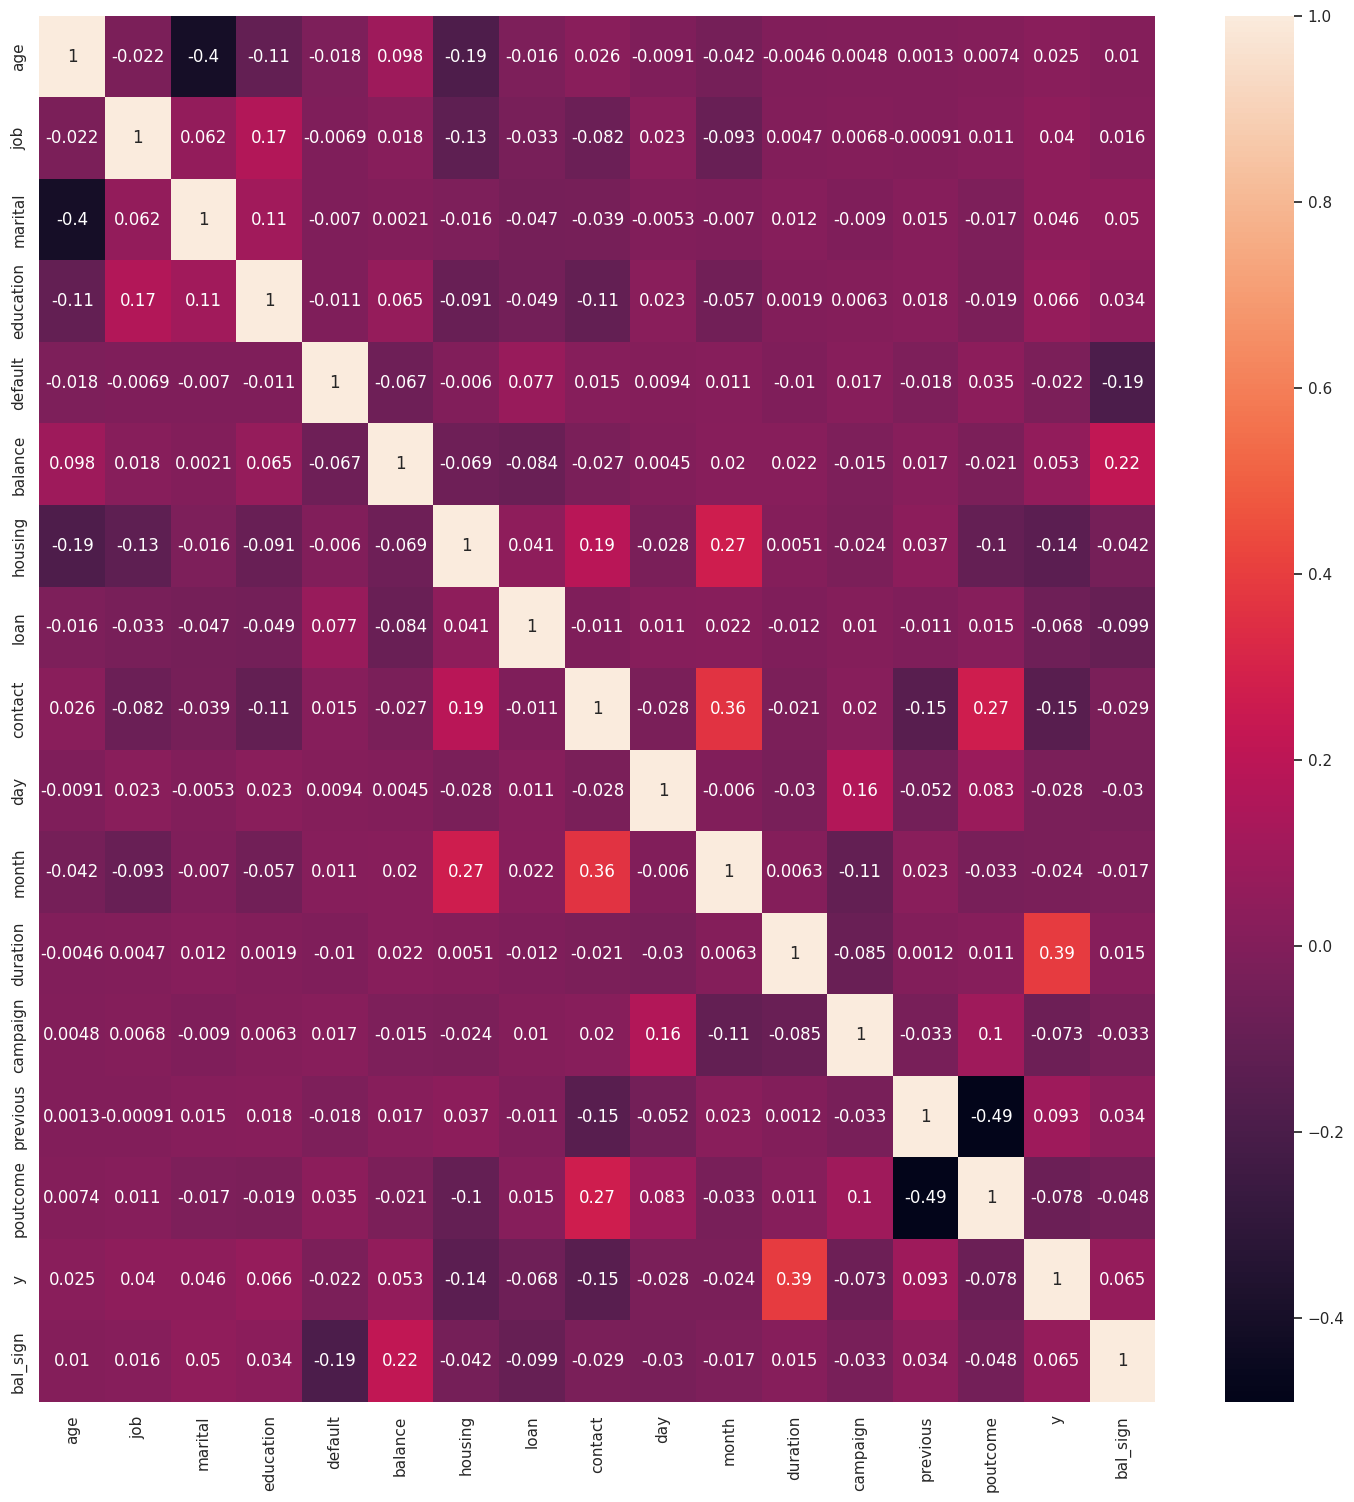

In [135]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

In [136]:
df = pd.get_dummies(df, columns = cols)

In [137]:
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
day_26,45211.0,0.024795,0.155501,0.0,0.0,0.0,0.0,1.0
day_27,45211.0,0.040477,0.197077,0.0,0.0,0.0,0.0,1.0
day_28,45211.0,0.038597,0.192634,0.0,0.0,0.0,0.0,1.0
day_29,45211.0,0.034638,0.182862,0.0,0.0,0.0,0.0,1.0


# Normalizing the Features

In [139]:
labels = df.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(df.drop(['y'], axis = 1)), columns = df.drop(['y'], axis = 1).columns)

In [140]:
features.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,bal_sign,...,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30
0,0.519481,0.0,0.092259,1.0,0.0,0.053070,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.337662,0.0,0.073067,1.0,0.0,0.030704,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.194805,0.0,0.072822,1.0,1.0,0.015453,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.376623,0.0,0.086476,1.0,0.0,0.018707,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.194805,0.0,0.072812,0.0,0.0,0.040260,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting Data into Training and Testing data

In [141]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, stratify = labels)

In [142]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [143]:
# DataFrame to store results
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

# 1. Decision Tree Classifier

In [144]:
params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [25, 50, 75, None],
    "min_samples_split": [3, 6],
    "min_samples_leaf": [2, 4],
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight="balanced"),
    param_grid=params,
    cv=cv,
    n_jobs=-1,
    scoring="f1",
)

clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 50, 75, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [145]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [146]:
clf.best_score_

0.528889330339948

In [147]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.529
Area under ROC on test data is : 0.814
Accuracy on test data is : 0.837


## **Analysis:**
I am using these parameters to hypertune my model:

1. Criterion: The criterion hyperparameter determines the function used to measure the quality of a split. Your model is tuning between "gini" and "entropy" as criteria for making decisions at each node.

2. Splitter: The splitter hyperparameter determines the strategy used to choose the split at each node. Your model is tuning between "best" (choosing the best split) and "random" (choosing the best random split).

3. Max Depth: The max_depth hyperparameter controls the maximum depth of the tree. Your model is tuning between maximum depths of 25, 50, 75, and no maximum depth (None).

4. Min Samples Split: The min_samples_split hyperparameter sets the minimum number of samples required to split an internal node. Your model is tuning between splitting nodes when there are at least 3 or 6 samples.

5. Min Samples Leaf: The min_samples_leaf hyperparameter sets the minimum number of samples required to be at a leaf node. Your model is tuning between leaf nodes having at least 2 or 4 samples.


 *Here's an interpretation of these scores:*

1. Accuracy (0.837):

The accuracy indicates that the model correctly predicted the outcome for approximately 83.7% of the test instances. It's a good starting point, but accuracy alone may not be sufficient, especially if the dataset is imbalanced.

2. F1-Score (0.529):

The F1-score is a harmonic mean of precision and recall. A value of 0.529 suggests a moderate balance between precision and recall. It's crucial to consider the specific requirements of your problem to determine whether this level of performance is acceptable.

3. Area under ROC (0.814):

The ROC AUC score of 0.814 indicates that the model has good discriminative power between positive and negative instances. This suggests that the model is performing reasonably well in distinguishing between the two classes.

**Pros:**
1. **Interpretability:** Decision trees are easy to understand and interpret, making them suitable for non-experts.
2. **No Assumptions:** Decision trees make no assumptions about the distribution of data, making them versatile.
3. **Handles Non-Linearity:** Can handle non-linear relationships between features and the target variable.
4. **Feature Importance:** Provides insights into feature importance for decision-making.
5. **Handles Mixed Data Types:** Can handle both numerical and categorical data.

**Cons:**
1. **Overfitting:** Decision trees are prone to overfitting, capturing noise in the data.
2. **Instability:** Small changes in data may result in a different tree structure.
3. **Limited Expressiveness:** Single decision trees may lack expressiveness compared to ensemble methods.
4. **Biased Toward Dominant Classes:** In imbalanced datasets, decision trees may be biased toward dominant classes.
5. **Sensitive to Small Variations:** Sensitive to small variations in the data, leading to different tree structures.

# 2. Random Forest Classifier

In [148]:
params = {
            "n_estimators" : [100, 200],
            "criterion" : ["gini", "entropy"],
            "max_depth" : [25, 50, 75],
            "min_samples_split" : [3, 6],
            "min_samples_leaf" : [2, 4]
        }
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 50, 75], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [149]:
f1_score(y_test, clf.predict(X_test))

0.6068914412745462

In [150]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 100}

In [151]:
clf.best_score_

0.6158732579021161

In [152]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.607
Area under ROC on test data is : 0.836
Accuracy on test data is : 0.883


## **Analysis:**

Here's an analysis of the performance:

1. **Accuracy (0.883):**
   - The accuracy indicates that the model correctly predicted the outcome for approximately 88.3% of the test instances. This is a relatively high accuracy, suggesting good overall predictive performance.

2. **F1-Score (0.607):**
   - The F1-score is a harmonic mean of precision and recall. A value of 0.607 indicates a moderate balance between precision and recall. This suggests the model is performing reasonably well in terms of both false positives and false negatives.

3. **Area under ROC (0.836):**
   - The ROC AUC score of 0.836 indicates that the model has good discriminative power between positive and negative instances. This suggests that the model is effective in distinguishing between the two classes.


In summary, the random forest model demonstrates strong performance based on the provided metrics, indicating its effectiveness in predicting the target variable. Further analysis of feature importance and potential fine-tuning of hyperparameters could provide additional insights and potentially enhance the model's performance.

**Pros:**
1. **High Accuracy:** Random Forest typically yields high accuracy by aggregating predictions from multiple decision trees.
2. **Reduced Overfitting:** Ensemble averaging reduces overfitting compared to individual decision trees.
3. **Handles Missing Values:** Can handle missing values and maintain predictive accuracy.
4. **Feature Importance:** Provides robust feature importance estimation.
5. **Versatility:** Effective for both classification and regression tasks.

**Cons:**
1. **Complexity:** Random Forest models can be computationally expensive and complex.
2. **Less Interpretability:** The ensemble nature makes it less interpretable than individual decision trees.
3. **Resource Intensive:** Training multiple trees requires more computational resources.
4. **Not Easily Parallelizable:** Training trees sequentially can limit parallelization in some cases.
5. **Sensitivity to Noisy Data:** Random Forests may overfit to noisy data or outliers.

# 3. AdaBoost Classifier

In [153]:
# Defining the base classifiers
base_classifiers = [
    DecisionTreeClassifier(class_weight="balanced"),
    LogisticRegression(class_weight='balanced', penalty='l2', solver='sag', max_iter=1000)  # Note: Adjust max_iter as needed
]

# Creating an AdaBoostClassifier with the base classifiers
ada_classifier = AdaBoostClassifier(base_estimator=base_classifiers[0], n_estimators=500, learning_rate=1.0)

# Fitting the model to the training data
ada_classifier.fit(X_train, y_train)

# Now, we can use the trained model for predictions on new data
y_pred_ada = ada_classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [154]:
# Now we evaluate the model using various metrics

f1_ada = f1_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_ada)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f"Accuracy (AdaBoost): {accuracy_ada:.3f}")
print(f"F1-Score (AdaBoost): {f1_ada:.3f}")
print(f"ROC AUC (AdaBoost): {roc_auc_ada:.3f}")

Accuracy (AdaBoost): 0.873
F1-Score (AdaBoost): 0.446
ROC AUC (AdaBoost): 0.683


## **Analysis:**

Here's an analysis of the performance:

1. **Accuracy (0.873):**
   - The accuracy indicates that the model correctly predicted the outcome for approximately 87.3% of the test instances. This is a relatively high accuracy, suggesting good overall predictive performance.

2. **F1-Score (0.446):**
   - A value of 0.446 suggests a moderate balance between precision and recall. However, it's lower compared to the other models, indicating potential challenges in managing false positives and false negatives.

3. **ROC AUC (0.683):**
   - The ROC AUC score of 0.683 indicates that the model has reasonable discriminative power between positive and negative instances. While not as high as the other models, it still suggests effective discrimination.

**Considerations:**

- **Class Imbalance:** Since there is a significant class imbalance in the dataset, it might be affecting the F1-score. In imbalanced datasets, F1-score can provide a more balanced assessment of a model's performance.

- **Trade-offs:** It's important to consider the specific requirements of the problem and whether a higher emphasis should be placed on precision, recall, or a balance between the two.


In summary, the AdaBoost model demonstrates good overall performance, especially in terms of accuracy, but there may be a trade-off between precision and recall. Further analysis and consideration of the specific problem context will help determine whether the model meets the desired objectives.

**Pros:**
1. **High Accuracy:** AdaBoost often achieves high accuracy by combining the strengths of multiple weak learners.
2. **No Overfitting Tendency:** AdaBoost is less prone to overfitting, even with complex models.
3. **Versatility:** Suitable for various types of data and different types of base learners.
4. **Feature Importance:** Can capture feature importance and adapt to complex decision boundaries.
5. **Less Parameter Tuning:** Requires minimal hyperparameter tuning compared to some other algorithms.

**Cons:**
1. **Sensitive to Noisy Data:** Adversely affected by noisy data and outliers.
2. **Computationally Intensive:** Can be computationally expensive due to sequential learning.
3. **Less Interpretable:** Less interpretable than simpler models due to the ensemble nature.
4. **Influence of Outliers:** Outliers can have a significant impact on the model's performance.
5. **Model Instability:** Performance may degrade if the weak classifiers are too complex or too weak.

# 4. Logistic Regression

In [155]:
params = [
            {
                "penalty" : ['l2'],
                "C" : [0.01, 0.1, 1.0, 10.0],
                "solver" : ["sag"],
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'],
                "C" : [0.01, 0.1, 1.0, 10.0],
                "solver" : ["saga"],
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv,
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='f1')

In [156]:
clf.best_params_

{'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [157]:
clf.best_score_

0.5590784991058012

In [158]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.551
Area under ROC on test data is : 0.830
Accuracy on test data is : 0.845


## **Analysis:**

**Parameter Tuning:**

- **Penalty:**
  - The model is being trained with both L2 (ridge) and L1 (lasso) penalties to handle regularization.

- **C:**
  - The inverse of regularization strength. The model is being trained with different values of C (0.01, 0.1, 1.0, 10.0).

- **Solver:**
  - The optimization algorithm used for logistic regression. "sag" and "saga" are selected for L2 and L1 penalties, respectively.

- **Max Iterations:**
  - The maximum number of iterations for the optimization algorithm. The model is being trained with 100 and 200 iterations.

Here's an evaluation of the performance:

1. **Accuracy (0.845):**
   - The accuracy indicates that the model correctly predicted the outcome for approximately 84.5% of the test instances. This is a good level of accuracy, suggesting effective overall predictive performance.

2. **F1-Score (0.551):**
   - A value of 0.551 suggests a moderate balance between precision and recall. This score provides insight into the model's ability to handle both false positives and false negatives.

3. **Area under ROC (0.830):**
   - The ROC AUC score of 0.830 indicates that the model has good discriminative power between positive and negative instances. This suggests that the model is effective in distinguishing between the two classes.

**Considerations:**

- The balanced class weight is specified, indicating that the model is accounting for potential class imbalances in the dataset.

- The grid search (hyperparameter tuning) is performed using F1-score as the evaluation metric, suggesting an emphasis on achieving a balance between precision and recall.


In summary, the logistic regression model shows good performance with respectable scores in accuracy, F1-score, and ROC AUC. The chosen hyperparameters are diverse and cover a range of regularization strengths and optimization strategies.

**Pros:**
1. **Interpretability:** Logistic Regression provides a clear interpretation of the relationship between features and the target variable.
2. **Efficiency:** Computationally efficient and performs well on large datasets.
3. **Probabilistic Predictions:** Outputs probabilities, making it useful for ranking predictions.
4. **No Assumptions About Data Distribution:** Makes no assumptions about the distribution of the features.
5. **Regularization:** Can apply regularization to prevent overfitting and handle multicollinearity.

**Cons:**
1. **Assumes Linearity:** Assumes a linear relationship between features and the log-odds of the target variable.
2. **Limited Modeling Complexity:** May not capture complex relationships present in the data.
3. **Sensitive to Outliers:** Outliers can disproportionately influence parameter estimates.
4. **Binary Outcome:** Primarily designed for binary classification tasks.
5. **May Require Feature Engineering:** Performance may benefit from feature engineering to capture non-linear relationships.

------------------------------------------------------------------------

------------------------------------------------------------------------

### **This section is some extra work if you have time you can go through this or you can delete the whole section and then run the notebook. Might save your 5 minutes :)**

This is just for the validation of my final model i.e. Random Forest.

We can see from the above results that feature selection/transformation/elimination techniques fail to improve the classification scores. And as for the original features, RandomForestClassifier turns out to be the best classifier in terms of F1-score and Area under ROC.

<Axes: xlabel='Classifier'>

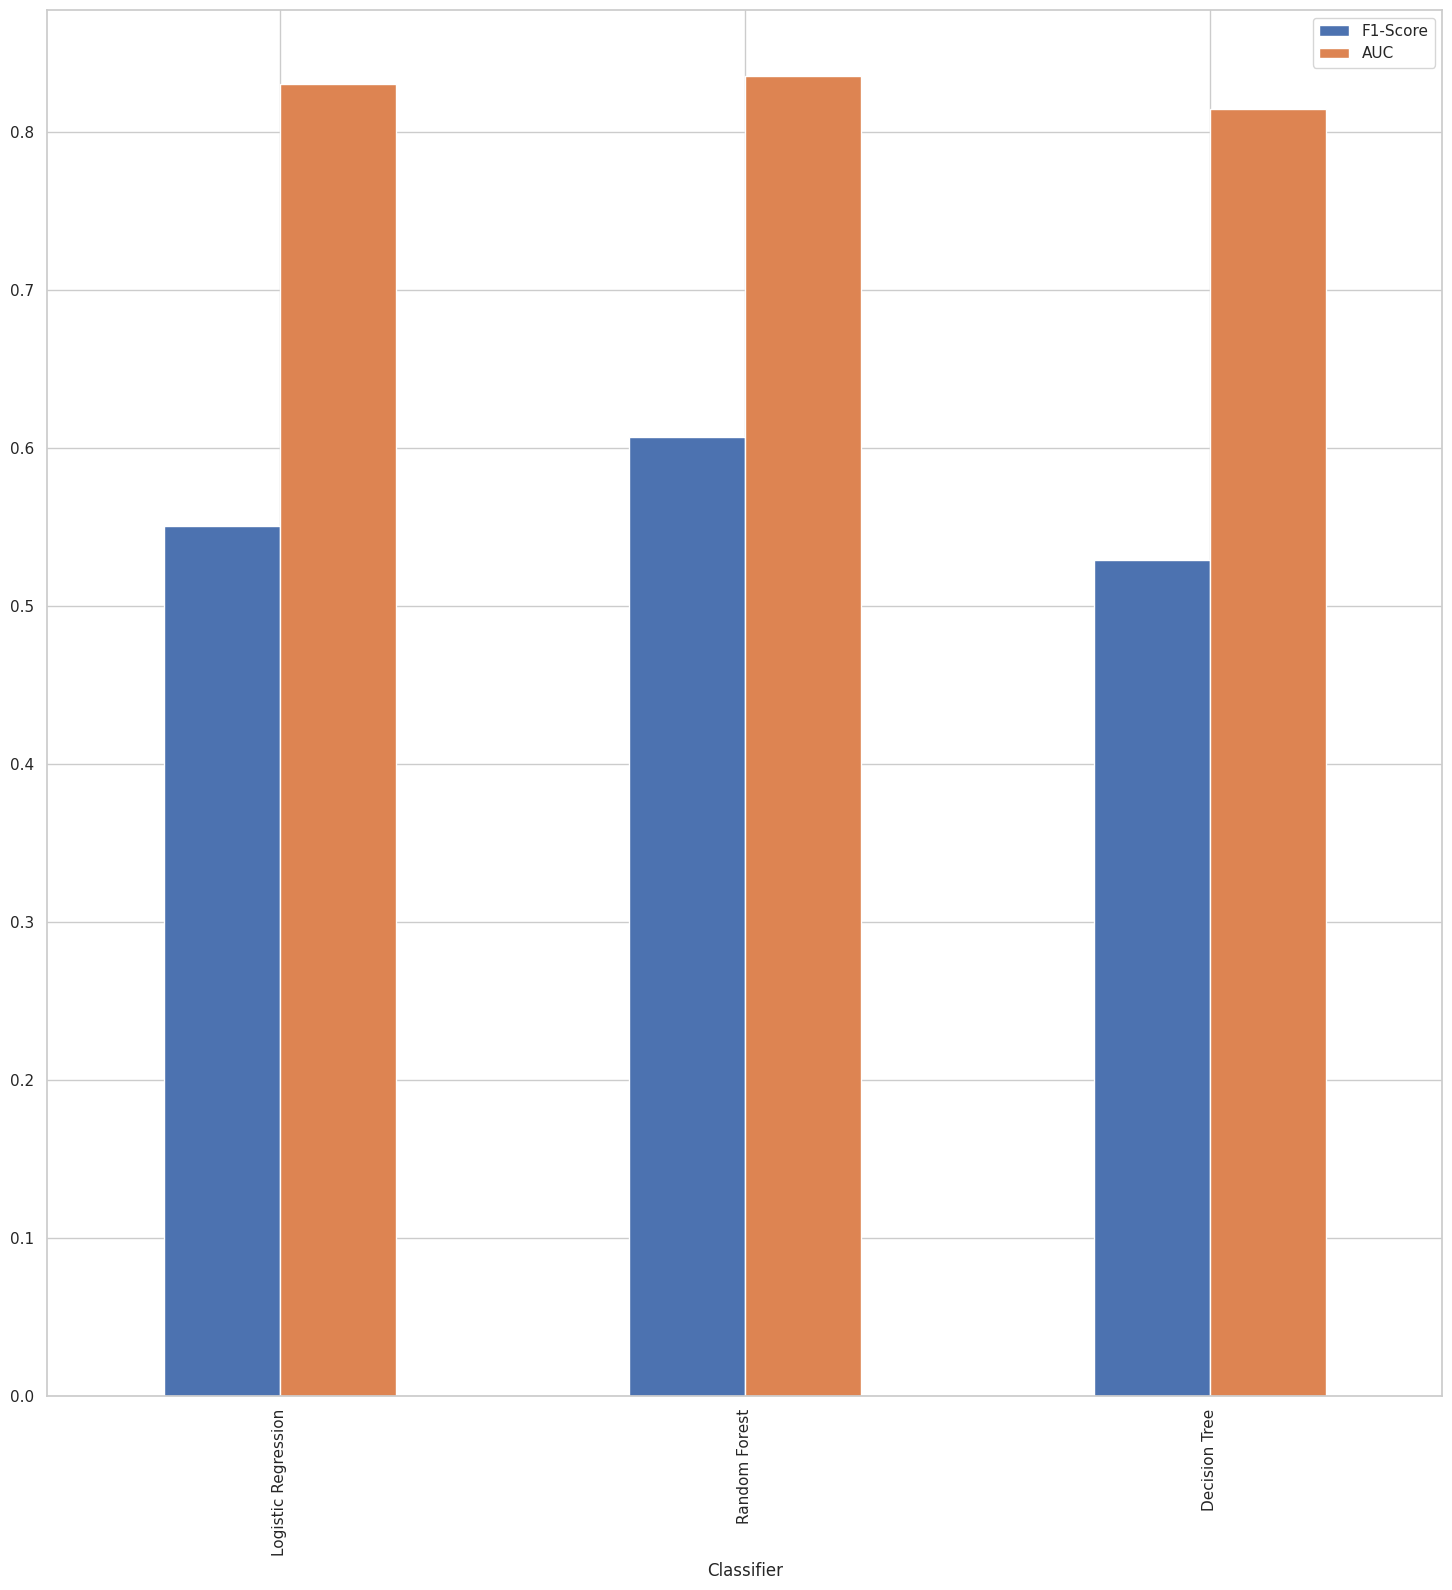

In [159]:
testing.drop(["Accuracy"], axis = 1).set_index("Classifier").plot.bar()

# Validating final model

Using the best parameters we retrain the Random Forest Classifier

In [160]:
# DataFrame to store results
ftesting = pd.DataFrame(columns = ["Random State", "F1-Score", "AUC", "Accuracy"])

In [161]:
def final_model(i):
    cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = i)
    params = {
                'criterion': ['entropy'],
                'max_depth': [40],
                'min_samples_leaf': [2],
                'min_samples_split': [6],
                'n_estimators': [200]
             }
    clf = GridSearchCV(RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, n_jobs = -1,
                       scoring = "f1")
    clf.fit(X_train, y_train)
    f1 = f1_score(y_test, clf.predict(X_test))
    auc = roc_auc_score(y_test, clf.predict(X_test))
    acc = accuracy_score(y_test, clf.predict(X_test))

    return f1, auc, acc

In [162]:
for i in range(10):
    f1, auc, acc = final_model(i)
    ftesting.loc[-1] = [i, f1, auc, acc]
    ftesting.index = ftesting.index + 1
    ftesting = ftesting.sort_index()

In [163]:
ftesting

,Random State,F1-Score,AUC,Accuracy
0,9.0,0.604790,0.798241,0.897822
1,8.0,0.608955,0.801549,0.898596
2,7.0,0.605905,0.798839,0.898153
3,6.0,0.600257,0.795503,0.896605
4,5.0,0.603854,0.797359,0.897711
5,4.0,0.608062,0.799687,0.898927
6,3.0,0.597691,0.793897,0.895942
7,2.0,0.596491,0.792952,0.895720
8,1.0,0.605106,0.799631,0.897379
9,0.0,0.603230,0.792621,0.899480


In [164]:
ftesting.drop(["Random State"], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
F1-Score,10.0,0.603434,0.004138,0.596491,0.601000,0.604322,0.605705,0.608955
AUC,10.0,0.797028,0.003115,0.792621,0.794298,0.797800,0.799433,0.801549
Accuracy,10.0,0.897634,0.001246,0.895720,0.896799,0.897766,0.898485,0.899480


The standard deviation of the scores is really low, which means that the changing the random states for the cross validation doesn't affect the scores much.

## The end